# 数据可视化作业题目(基于`Matplotlib`)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
%matplotlib inline
# %config InlineBackend.figure_format= "svg"
plt.rcParams["xtick.direction"]="in"
plt.rcParams["ytick.direction"]="in"

# ignore the SSL verification 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 练习1：航班乘客变化分析 (2个题)

In [3]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#### 分析年度乘客总量的变化情况（提示：折线图）+ 乘客量在一年中12个月份的分布（提示：柱状图）

Text(0, 0.5, 'number')

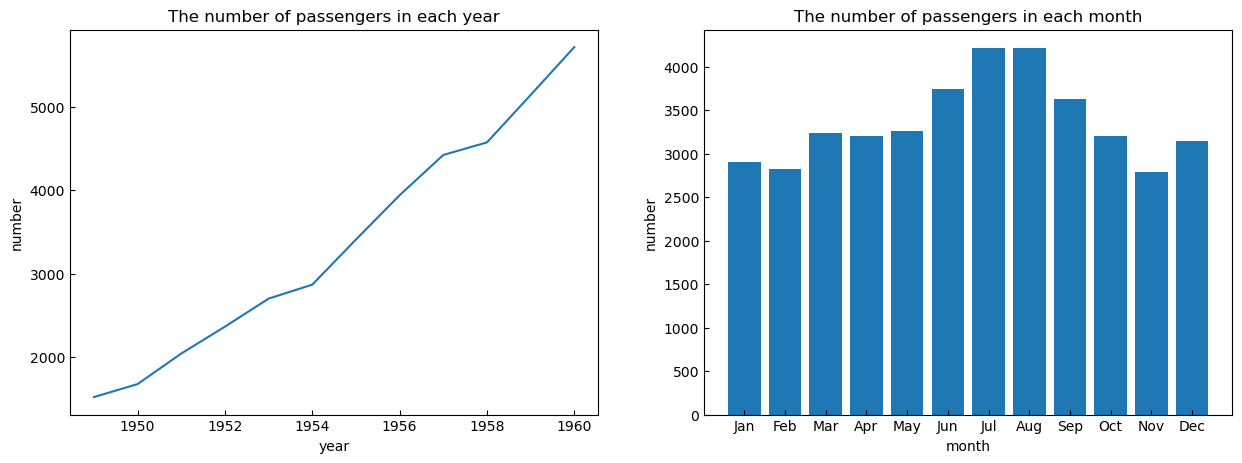

In [4]:
fig, axes=plt.subplots(1, 2, figsize=(15, 5))
ax=axes[0]
passengers_pyr=data.groupby("year")["passengers"].sum()
ax.plot(passengers_pyr.index, passengers_pyr.values)
ax.set_title("The number of passengers in each year")
ax.set_xlabel("year")
ax.set_ylabel("number")

ax=axes[1]
passengers_pmon=data.groupby("month")["passengers"].sum()
ax.bar(passengers_pmon.index, passengers_pmon.values)
ax.set_title("The number of passengers in each month")
ax.set_xlabel("month")
ax.set_ylabel("number")


## 练习2：鸢尾花花型尺寸分析 (3个题)


#### 1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）


In [5]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


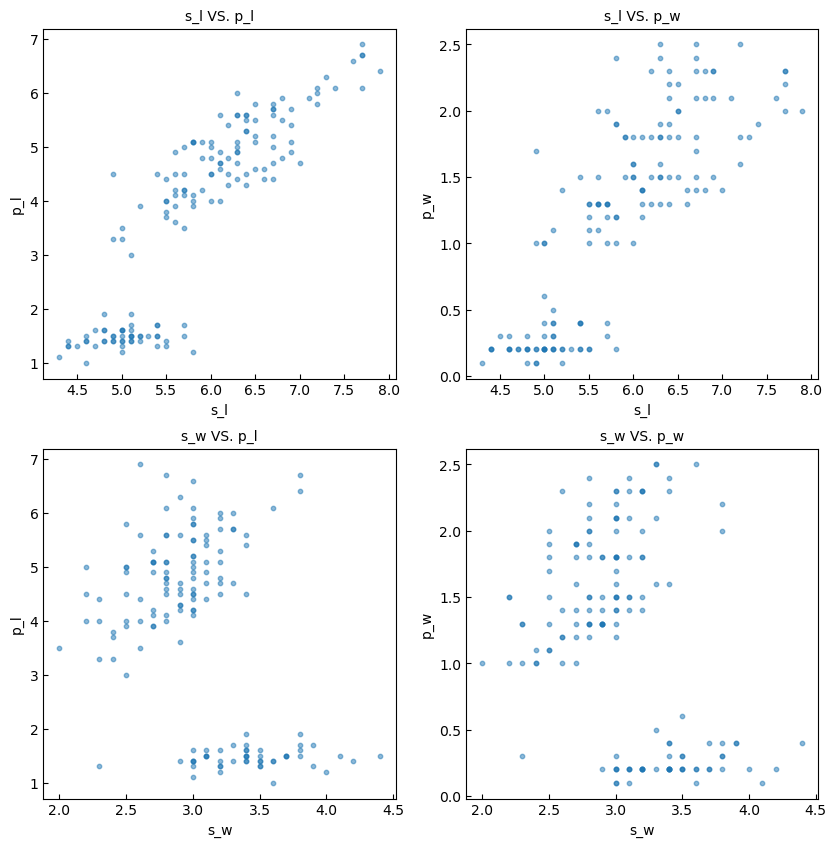

In [6]:
fig, axes=plt.subplots(2, 2, figsize=(10, 10))
labels_dict={"s_l":"sepal_length", "s_w":"sepal_width", "p_l":"petal_length", "p_w":"petal_width"}
xlabels=["s_l", "s_w"]
ylabels=["p_l", "p_w"]
for i in range(2):
    xlabel=xlabels[i]
    for j in range(2):
        ylabel=ylabels[j]
        ax=axes[i,j]
        ax.scatter(data[labels_dict[xlabel]], data[labels_dict[ylabel]], s=10, alpha=0.5)
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_title(f"{xlabel} VS. {ylabel}", fontsize=10)


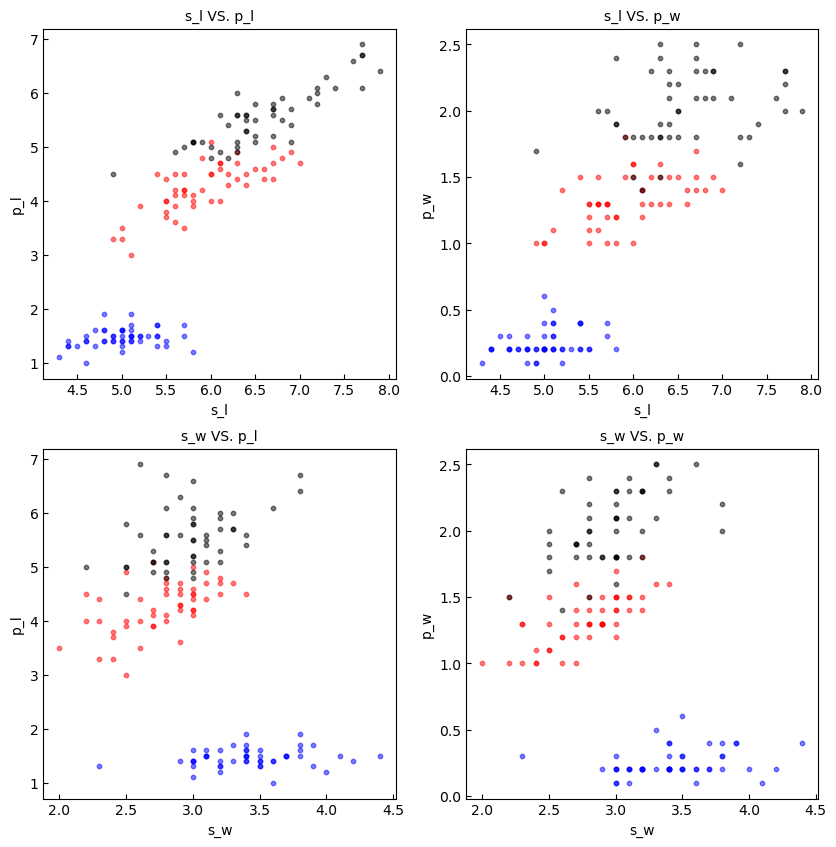

In [7]:
fig, axes=plt.subplots(2, 2, figsize=(10, 10))
labels_dict={"s_l":"sepal_length", "s_w":"sepal_width", "p_l":"petal_length", "p_w":"petal_width"}
xlabels=["s_l", "s_w"]
ylabels=["p_l", "p_w"]
colors=["blue", "r", "black"]

for ns, spec in enumerate(data["species"].unique()):
    sl= data["species"]==spec
    for i in range(2):
        xlabel=xlabels[i]
        for j in range(2):
            ylabel=ylabels[j]
            ax=axes[i,j]
            ax.scatter(data[labels_dict[xlabel]][sl], data[labels_dict[ylabel]][sl], s=10, alpha=0.5, color=colors[ns])
            ax.set_xlabel(xlabel, fontsize=10)
            ax.set_ylabel(ylabel, fontsize=10)
            ax.set_title(f"{xlabel} VS. {ylabel}", fontsize=10)


#### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

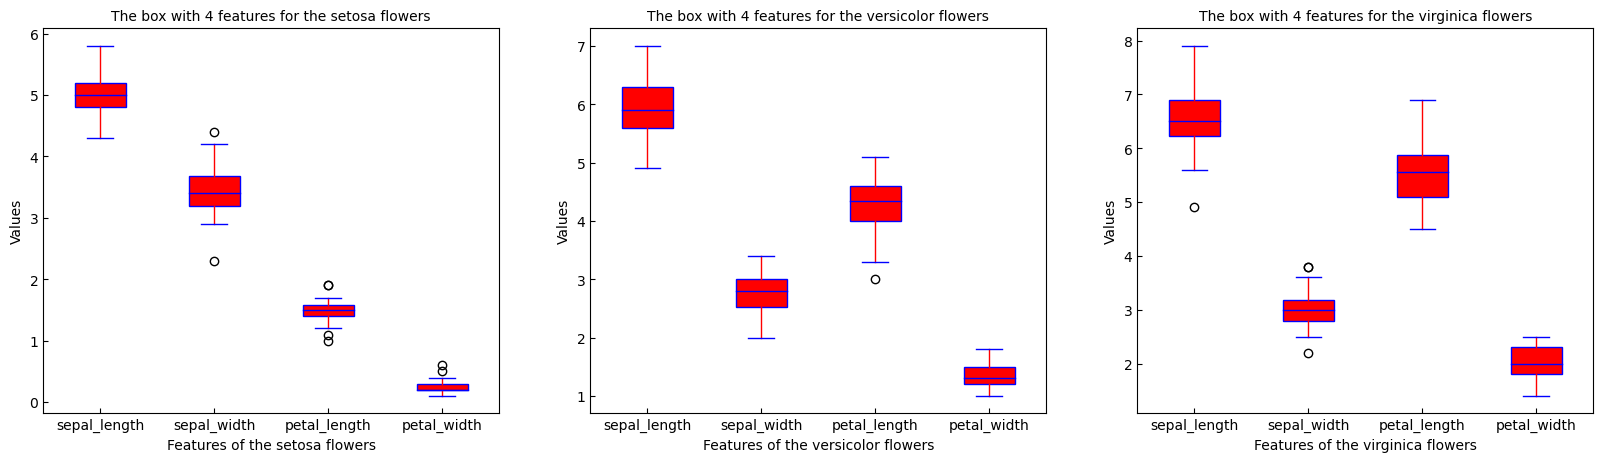

In [8]:
fig, axes=plt.subplots(1, 3, figsize=(20, 5))
species=data["species"].unique().tolist()
features=data.columns.tolist()[:-1]
for ns, spec in enumerate(species):
    sl= data["species"]==spec
    ax=axes[ns]
    ax.boxplot([data[feature][sl] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
    ax.set_xlabel(f"Features of the {spec} flowers", fontsize=10)
    ax.set_ylabel("Values", fontsize=10)
    ax.set_title(f"The box with 4 features for the {spec} flowers", fontsize=10)


#### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

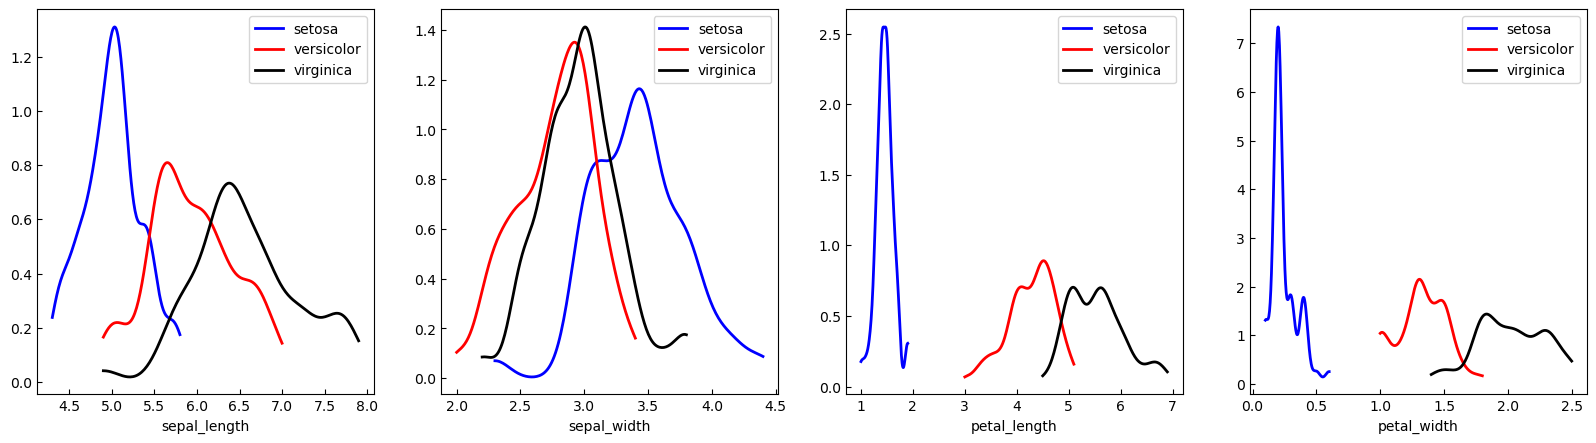

In [9]:
from scipy.stats import gaussian_kde
fig, axes=plt.subplots(1, 4, figsize=(20, 5))
species=data["species"].unique().tolist()
features=data.columns.tolist()[:-1]
colors=["blue", "r", "black"]
for nf, feature in enumerate(features):
    ax=axes[nf]
    # ax.set_title(feature)
    for ns, spec in enumerate(species):
        sl= data["species"]==spec
        data_sl=data[feature][sl]
        density_est = gaussian_kde(data_sl)
        density_est.covariance_factor = lambda : .3
        density_est._compute_covariance()
        x_data = np.linspace(min(data_sl), max(data_sl), 200)
        ax.plot(x_data, density_est(x_data), lw = 2, label=spec, color=colors[ns])
    ax.legend()
    ax.set_xlabel(f"{feature}", fontsize=10)
    # ax.set_ylabel("Values", fontsize=10)
    


## 练习3：餐厅小费情况分析 (7个题)

In [10]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1. 小费和总消费之间的关系（提示：散点图+回归分析）

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
xlabel="total_bill"
ylabel="tip"
x = sm.add_constant(data[xlabel]) # 线性回归增加常数项
y = data[ylabel]
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, data2, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = data2[:,2]

In [12]:
# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = data2[:,4:6].T

CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = data[xlabel]
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序

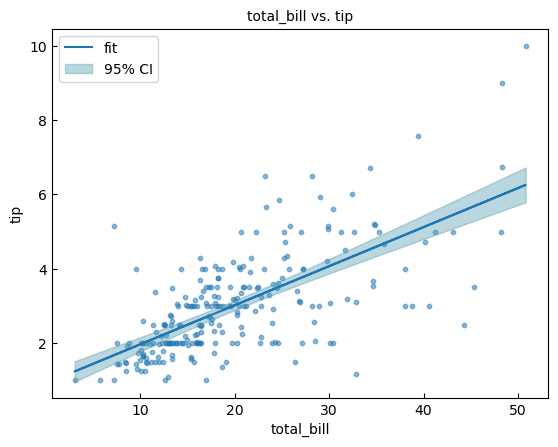

In [13]:
fig, ax=plt.subplots()

ax.scatter(data[xlabel], data[ylabel], s=10, alpha=0.5)
ax.plot(data[xlabel], fitted_values, label="fit")
ax.fill_between(CI_df['x_data'], CI_df['low_CI'], CI_df['upper_CI'], color = '#539caf', alpha = 0.4, label = '95% CI')
ax.set_xlabel(xlabel, fontsize=10)
ax.set_ylabel(ylabel, fontsize=10)
ax.set_title(f"{xlabel} vs. {ylabel}", fontsize=10)
ax.legend()

#### 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

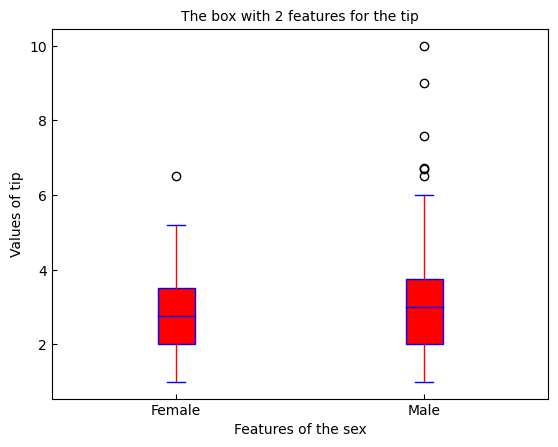

In [14]:
fig, ax=plt.subplots()
xlabel="sex"
ylabel="tip"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）


Text(0.5, 1.0, 'The box with 2 features for the tip')

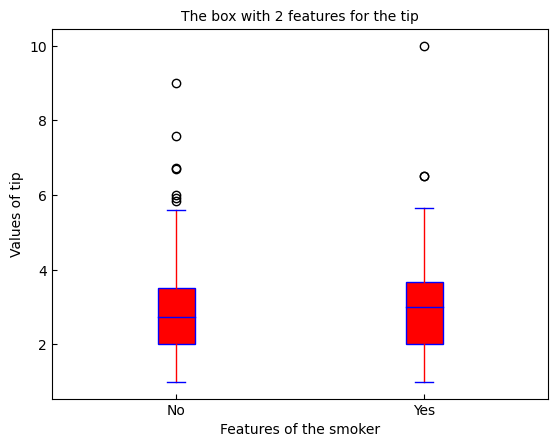

In [15]:
fig, ax=plt.subplots()
xlabel="smoker"
ylabel="tip"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 4 features for the tip')

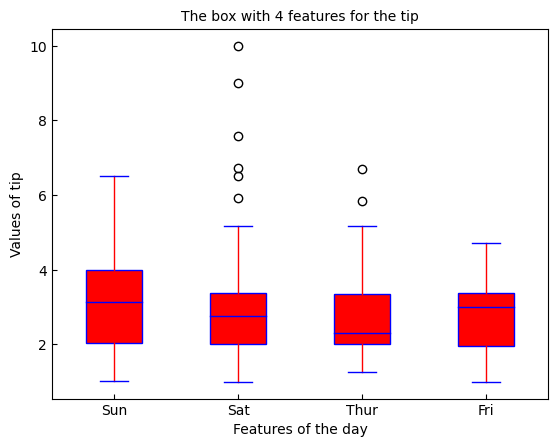

In [16]:
fig, ax=plt.subplots()
xlabel="day"
ylabel="tip"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

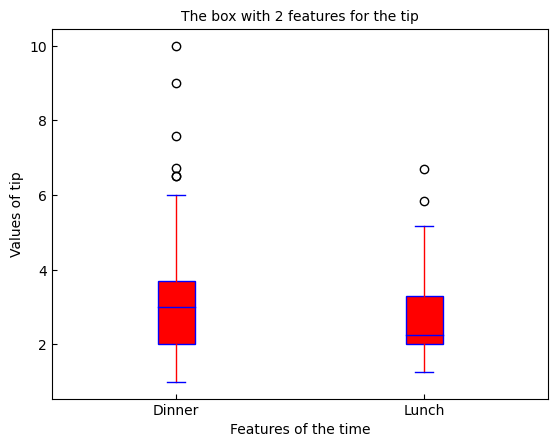

In [17]:
fig, ax=plt.subplots()
xlabel="time"
ylabel="tip"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 6 features for the tip')

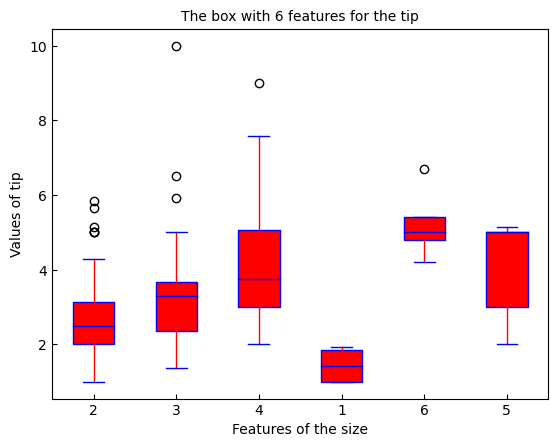

In [18]:
fig, ax=plt.subplots()
xlabel="size"
ylabel="tip"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


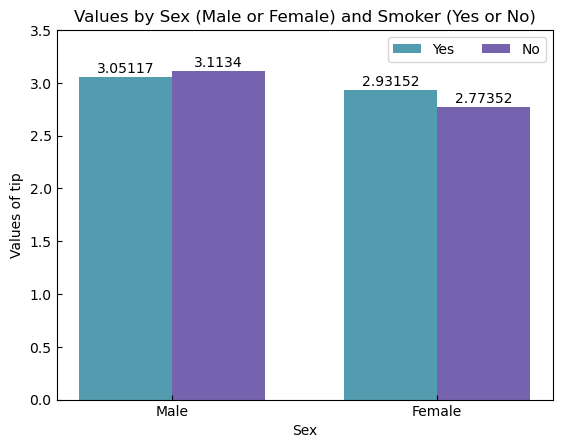

In [19]:
tips=data.groupby(["sex", "smoker"])["tip"].mean().unstack()
print(tips)

xlabels1=tips.index.tolist()
xlabels2=tips.columns.tolist()

fig, ax=plt.subplots()
width=0.35
colors=['#539caf', '#7663b0']
x=np.arange(len(xlabels1))
for n, label in enumerate(xlabels2):
    offset = width * n
    rects=ax.bar(x + offset, tips.loc[:,label], width, label=label, color=colors[n])
    ax.bar_label(rects, padding=1)

ax.set_xlabel("Sex")
ax.set_ylabel("Values of tip")
ax.set_title("Values by Sex (Male or Female) and Smoker (Yes or No)")
ax.set_xticks(x + width/2, xlabels1)
ax.set_ylim(0, 3.5)
ax.legend(ncols=2)

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

In [20]:
data = sns.load_dataset("titanic")
# data.dropna(inplace=True)
data.head()

# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

In [21]:
x2="survived"
data.groupby("pclass")[x2].sum()
data.isnull().any(axis=0)[x2]
print(f"whether the column {x2} contains NaN: {data.isnull().any(axis=0)[x2]}")

sur_prop=data.groupby("pclass")[x2].sum().to_frame()
sur_prop["unsurved"]=data.groupby("pclass")[x2].size()-sur_prop[x2]
sur_prop["total"]=data.groupby("pclass")[x2].size()
sur_prop["survived_prop"]=sur_prop[x2]/sur_prop["total"]
sur_prop["unsurvived_prop"]=sur_prop["unsurved"]/sur_prop["total"]
sur_prop

whether the column survived contains NaN: False


,survived,unsurved,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


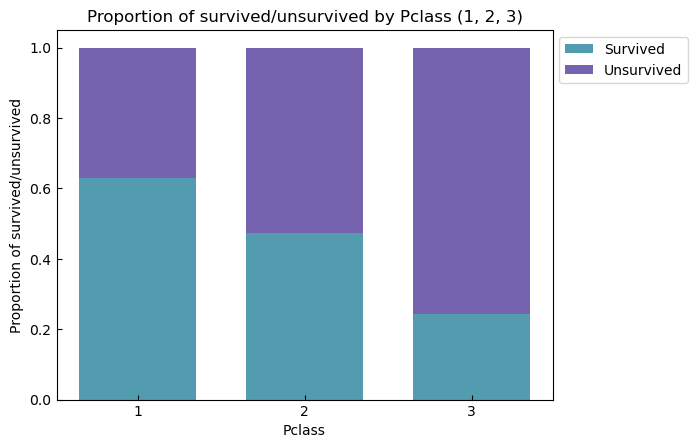

In [22]:
fig, ax=plt.subplots()
pclass=np.array(data["pclass"].unique().tolist(), dtype=int)
pclass.sort()

width=0.7
colors=["#539caf", "#7663b0"]
labels=["Survived", "Unsurvived"]
bottom=np.zeros_like(pclass)

for j, num in enumerate(["survived_prop", "unsurvived_prop"]):
    y=sur_prop[num]
    ax.bar(pclass, y, bottom=bottom, width=width, color=colors[j], label=labels[j])
    bottom=bottom+y

ax.set_xlabel("Pclass")
ax.set_ylabel("Proportion of survived/unsurvived")
ax.set_title("Proportion of survived/unsurvived by Pclass (1, 2, 3)")
ax.set_xticks(pclass, pclass)
ax.legend(bbox_to_anchor = (1,1))

#### 2. 不同性别的幸存比例（提示：箱图或者提琴图）

In [23]:
x1="sex"
x2="survived"
data.groupby(x1)[x2].sum()
data.isnull().any(axis=0)[x2]
print(f"whether the column {x2} contains NaN: {data.isnull().any(axis=0)[x2]}")

sur_prop=data.groupby(x1)[x2].sum().to_frame()
sur_prop["unsurved"]=data.groupby(x1)[x2].size()-sur_prop[x2]
sur_prop["total"]=data.groupby(x1)[x2].size()
sur_prop["survived_prop"]=sur_prop[x2]/sur_prop["total"]
sur_prop["unsurvived_prop"]=sur_prop["unsurved"]/sur_prop["total"]
sur_prop

whether the column survived contains NaN: False


,survived,unsurved,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


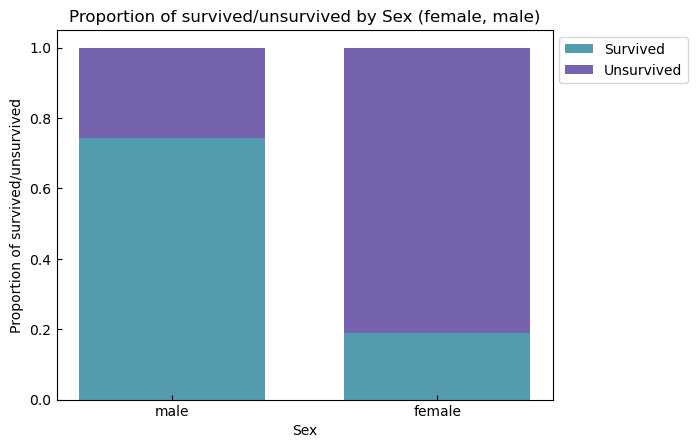

In [24]:
fig, ax=plt.subplots()
pclass=data[x1].unique()
# pclass.sort()

width=0.7
colors=["#539caf", "#7663b0"]
labels=["Survived", "Unsurvived"]
bottom=np.zeros_like(pclass)

for j, num in enumerate(["survived_prop", "unsurvived_prop"]):
    y=sur_prop[num]
    ax.bar(pclass, y, bottom=bottom, width=width, color=colors[j], label=labels[j])
    bottom=bottom+y

ax.set_xlabel("Sex")
ax.set_ylabel("Proportion of survived/unsurvived")
ax.set_title("Proportion of survived/unsurvived by Sex (female, male)")
# ax.set_xticks(pclass, pclass)
ax.legend(bbox_to_anchor=(1,1))

#### 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the fare')

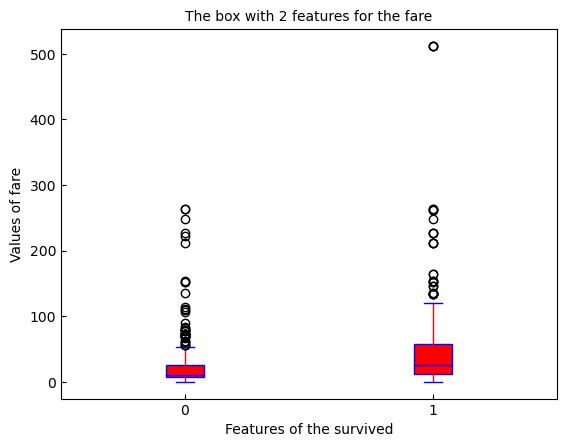

In [25]:
fig, ax=plt.subplots()
xlabel="survived"
ylabel="fare"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the age')

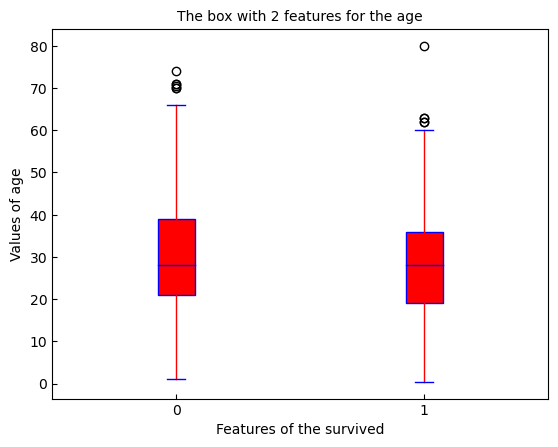

In [26]:
fig, ax=plt.subplots()
xlabel="survived"
ylabel="age"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature][~data[ylabel][data[xlabel]==feature].isnull()] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


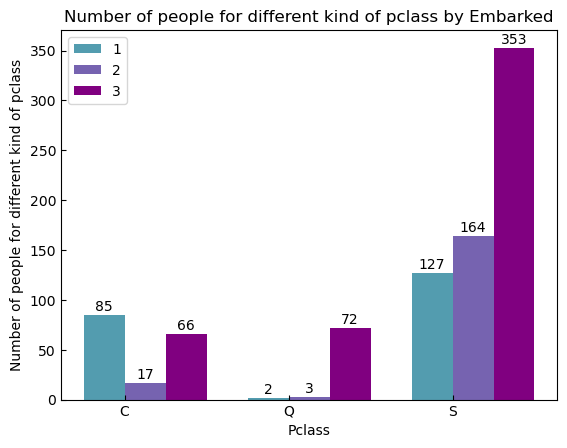

In [27]:
tips=data.groupby(["embarked", "pclass"]).size().unstack()
print(tips)

xlabels1=tips.index.tolist()
xlabels2=tips.columns.tolist()

fig, ax=plt.subplots()
width=0.25
colors=['#539caf', '#7663b0', "purple"]
x=np.arange(len(xlabels1))
for n, label in enumerate(xlabels2):
    offset = width * n
    rects=ax.bar(x + offset, tips.loc[:,label], width, label=label, color=colors[n])
    ax.bar_label(rects, padding=1)


ax.set_xlabel("Pclass")
ax.set_ylabel("Number of people for different kind of pclass")
ax.set_title("Number of people for different kind of pclass by Embarked")
ax.set_xticks(x + width/2, xlabels1)
# ax.set_ylim(0, 3.5)
ax.legend(ncols=1)

#### 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the sibsp')

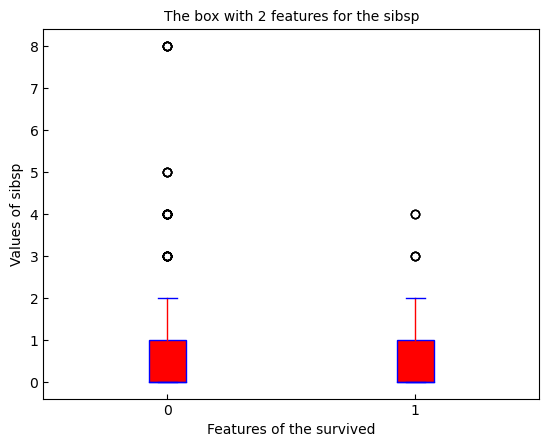

In [29]:
fig, ax=plt.subplots()
xlabel="survived"
ylabel="sibsp"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature][~data[ylabel][data[xlabel]==feature].isnull()] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the parch')

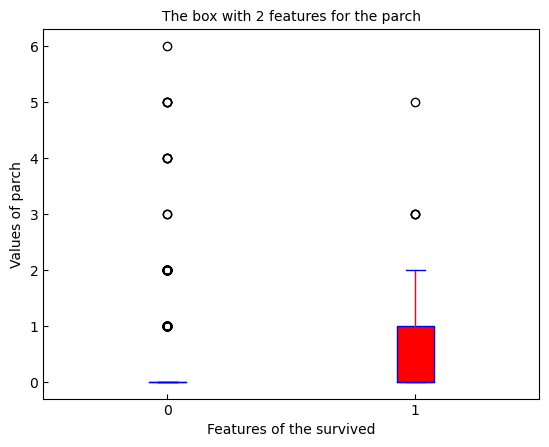

In [30]:
fig, ax=plt.subplots()
xlabel="survived"
ylabel="parch"
features=data[xlabel].unique().tolist()
ax.boxplot([data[ylabel][data[xlabel]==feature][~data[ylabel][data[xlabel]==feature].isnull()] for feature in features],
               labels=features,
               patch_artist=True,
               boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

survived    0    1
alone             
False     175  179
True      374  163


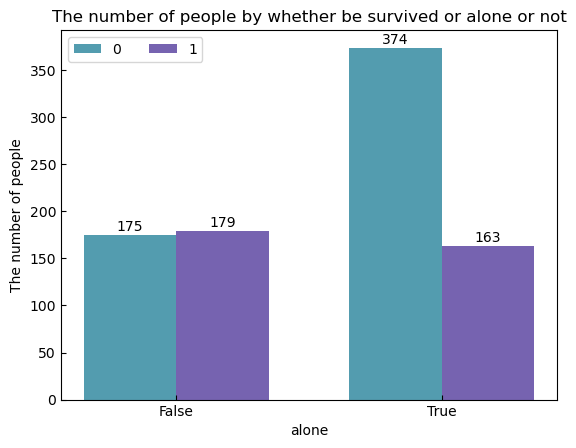

In [31]:
tips=data.groupby(["alone", "survived"]).size().unstack()
print(tips)

xlabels1=tips.index.tolist()
xlabels2=tips.columns.tolist()

fig, ax=plt.subplots()
width=0.35
colors=['#539caf', '#7663b0']
x=np.arange(len(xlabels1))
for n, label in enumerate(xlabels2):
    offset = width * n
    rects=ax.bar(x + offset, tips.loc[:,label], width, label=label, color=colors[n])
    ax.bar_label(rects, padding=1)


ax.set_xlabel("alone")
ax.set_ylabel("The number of people")
ax.set_title("The number of people by whether be survived or alone or not")
ax.set_xticks(x + width/2, xlabels1)
# ax.set_ylim(0, 3.5)

ax.legend(ncols=2)